<a href="https://colab.research.google.com/github/Hrtsh-Ynkzn/self_study/blob/main/2_2_1_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ニューラルネットワークのパラメータ導出の手順を学ぶ
from sklearn.datasets import load_digits

digits = load_digits()          # 手書き文字認識のためのデータセットを読み込む
X = digits.data                 # 説明変数（特微量）を格納
y = digits.target               # 目的変数を格納
print(X.shape, y.shape)         # shape属性で配列の形状の確認


(1797, 64) (1797,)


In [2]:
# 深層学習ライブラリとしてPyTorchを使用する
import torch

# 取得したデータをPyTorchで扱える形式に変換
X = torch.tensor(X, dtype = torch.float32)
y = torch.tensor(y, dtype = torch.int64)

In [3]:
# アーキテクチャ、目的関数、最適化手法を定義する
from torch import nn, optim

model = nn.Sequential(
        nn.Linear(64, 32),
        nn.ReLU(),
        nn.Linear(32, 16),
        nn.ReLU(),
        nn.Linear(16, 10),
        )

model.train()
lossfun   = nn.CrossEntropyLoss()                       # 目的関数にはクロスエントロピーを採用
optimizer = optim.SGD(model.parameters(), lr = 0.01)    # 最適化手法としてSGDを採用


In [4]:
# 学習を実行
losses = []

for ep in range(100):
    optimizer.zero_grad()

    # yの予測値を算出
    out = model(X)

    # 損失を計算
    loss = lossfun(out, y)
    loss.backward()

    # 勾配を更新
    optimizer.step()

    losses.append(loss.item())

In [5]:
# 学習結果を確認
_, pred = torch.max(out, 1)
print((pred == y).sum().item() / len(y))

0.8542014468558708


Text(0, 0.5, 'loss')

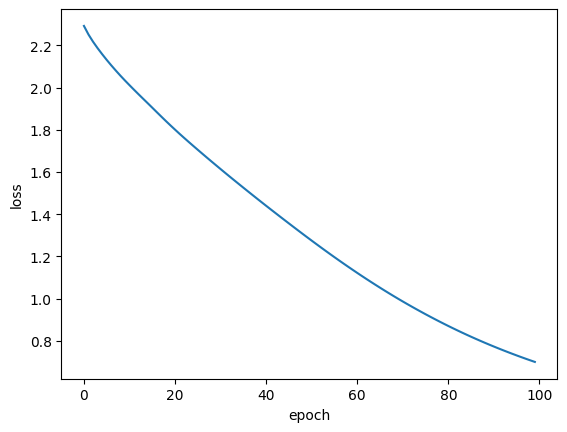

In [6]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('epoch')
plt.ylabel('loss')

In [7]:
import torch
from sklearn.datasets import load_digits
from torch.utils.data import DataLoader, TensorDataset

digits = load_digits()
X = digits.data
y = digits.target

X = torch.tensor(X, dtype = torch.float32)
y = torch.tensor(y, dtype = torch.int64)
dataset    = TensorDataset(X, y)
dataloader = DataLoader(dataset, batch_size = 64, shuffle = False)

In [8]:
def train_lepoch(model, train_loader, lossfun, optimizer, device):
    model.train()
    total_loss, total_acc = 0.0, 0.0

    for x, y in tpdm(train_loader):
        x = x.to(device)
        y = y.to(device)

        optimizer.zero_grad()

        # yの予測値を算出
        out = model(x)

        # 損失を計算
        loss = lossfm(out, y)
        loss.backward()

        # 勾配を更新
        optimizer.step()

        # バッチ単位の損失を計算
        total_loss += loss.item() * x.size(0)

        # バッチ単位の生徒率を計算
        _, pred    = torch.max(out,1)
        total_acc += torch.sum(pred == y.data)

    avg_loss = total_loss / len(train_loader.dataset)
    avg_acc  = total_acc / len(train_loader.dataset)
    return avg_acc, avg_loss